<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 3rd exercise: <font color="#C70039">Do DBScan clustering for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: Lena Pickartz (11330741)
* Date:   23.10.2024

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/400px-DBSCAN-Illustration.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**:
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole.

**GENERAL NOTE 2**:
* Please, when commenting source code, just use English language only.
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using the DBScan clustering algorithm for anomaly detection.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points.
If a task is more challenging and consists of several steps, this is indicated as well.
Make sure you have worked down the task list and commented your doings.
This should be done by using markdown.<br>
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date.
    * set the date too and remove mine.
3. read the entire notebook carefully
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time.
4. take the three data sets from exercize 1 and cluster them
5. read the following <a href="https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan">article</a> for getting help estimating eps and minPts
    * https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan
6. describe your findings and interpret the results
-----------------------------------------------------------------------------------

In [5]:
from sklearn.cluster import DBSCAN
import numpy as np
from numpy.random import randn
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

The output of the below code is 94. This is the total number of noisy points. SKLearn labels the noisy points as (-1). The downside with this method is that the higher the dimension, the less accurate it becomes. You also need to make a few assumptions like estimating the right value for eps which can be challenging.

In [6]:
# hyperparameters
minPts = 2
eps = 3

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(random_data)

list(clusters).count(-1)

94

# Data Set 1: Resting Blood Pressure

In [7]:
import pandas as pd

#Access the dataset (Source = https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)
url_1 = 'https://raw.githubusercontent.com/len-rtz/AML/refs/heads/main/data/heart.csv'

# Load the dataset
df_1 = pd.read_csv(url_1)

# Extract the resting blood pressure (in mm Hg) column and drop missing values
heart_rate_data = df_1['trtbps'].dropna()

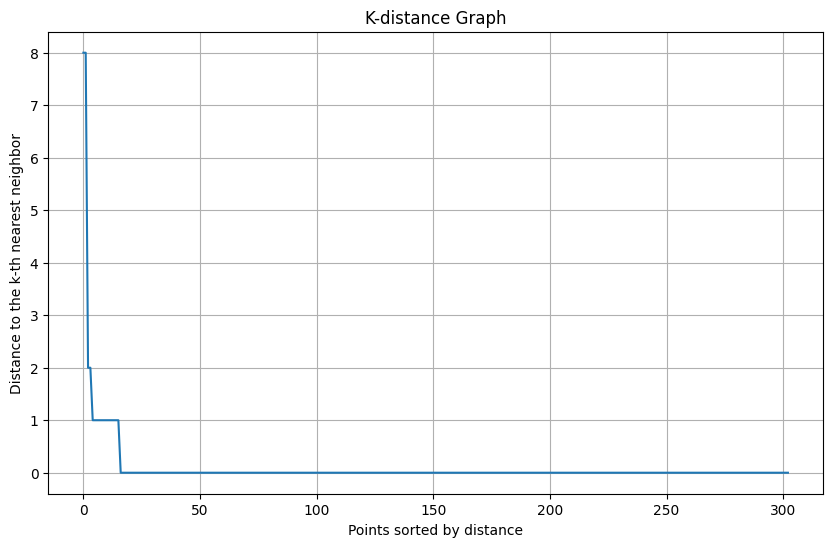

Optimal eps: 5


In [38]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
#!pip install kneed
from kneed import KneeLocator

# Reshape the data to a 2D array
X = heart_rate_data.values.reshape(-1, 1)

# Parameters
minPts = 2

# Step 1: Calculate k-distance
nbrs = NearestNeighbors(n_neighbors=minPts).fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort distances to create a K-distance graph
distance_desc = sorted(distances[:, minPts-1], reverse=True)

# Plot K-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distance_desc)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to the k-th nearest neighbor')
plt.grid()
plt.show()

# Find the optimal eps using the Kneedle method
kneedle = KneeLocator(
    range(1, len(distance_desc) + 1),  # x values
    distance_desc,                     # y values
    S=1.0,                             # parameter suggested from paper
    curve="convex",                   # parameter from figure
    direction="decreasing"            # parameter from figure
)

# Print the knee point to determine optimal eps
optimal_eps = kneedle.knee
print(f'Optimal eps: {optimal_eps}')

In [42]:
# hyperparameters
minPts = 2 #A rule of thumb is to set: min_samples = 2 * D (Dimension)
eps = 5

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(X)

list(clusters).count(-1)

2

# Observation

# Data Set 2: Weight of Babies

In [39]:
#Access the dataset (Source = https://www.kaggle.com/datasets/danbraswell/temporary-us-births)
url_2 = 'https://raw.githubusercontent.com/len-rtz/AML/refs/heads/main/data/us_births_2016_2021.csv'

# Load the dataset
df_2 = pd.read_csv(url_2)

# Extract the weight column and drop missing values
baby_weight_data = df_2['Average Birth Weight (g)'].dropna()

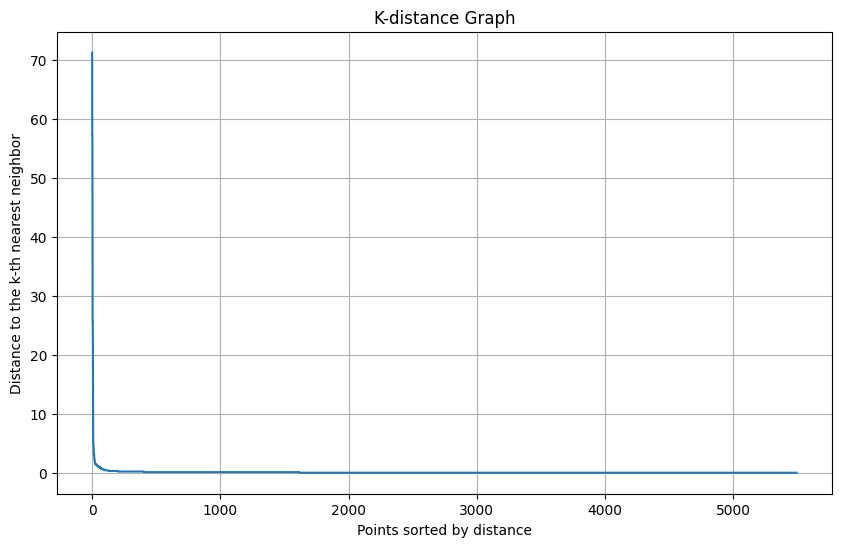

Optimal eps: 28


In [40]:
# Reshape the data to a 2D array
X_2 = baby_weight_data.values.reshape(-1, 1)

# Parameters
minPts = 2

# Step 1: Calculate k-distance
nbrs = NearestNeighbors(n_neighbors=minPts).fit(X_2)
distances, indices = nbrs.kneighbors(X_2)

# Sort distances to create a K-distance graph
distance_desc = sorted(distances[:, minPts-1], reverse=True)

# Plot K-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distance_desc)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to the k-th nearest neighbor')
plt.grid()
plt.show()

# Find the optimal eps using the Kneedle method
kneedle = KneeLocator(
    range(1, len(distance_desc) + 1),  # x values
    distance_desc,                     # y values
    S=1.0,                             # parameter suggested from paper
    curve="convex",                   # parameter from figure
    direction="decreasing"            # parameter from figure
)

# Print the knee point to determine optimal eps
optimal_eps = kneedle.knee
print(f'Optimal eps: {optimal_eps}')

In [43]:
# hyperparameters
minPts = 2 #A rule of thumb is to set: min_samples = 2 * D (Dimension)
eps = 28

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(X_2)

list(clusters).count(-1)

4

# Observation

# Data Set 3: Renewable Power Production France

In [44]:
#Access the dataset (Source = https://www.kaggle.com/datasets/henriupton/wind-solar-electricity-production)
url_3 = 'https://raw.githubusercontent.com/len-rtz/AML/refs/heads/main/data/intermittent-renewables-production-france.csv'

# Load the dataset
df_3 = pd.read_csv(url_3)

# Extract the production in MWh column and drop missing values
renewable_energy_data = df_3['Production'].dropna()

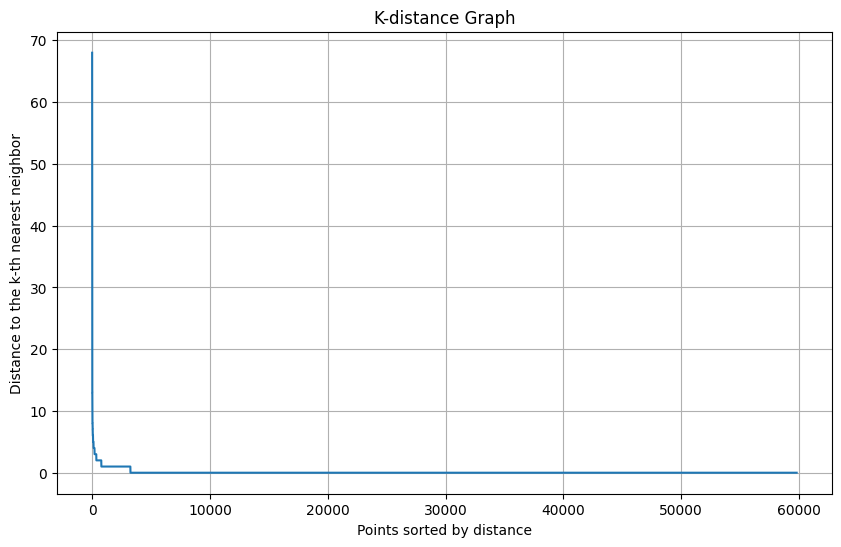

Optimal eps: 9


In [45]:
# Reshape the data to a 2D array
X_3 = renewable_energy_data.values.reshape(-1, 1)

# Parameters
minPts = 2

# Step 1: Calculate k-distance
nbrs = NearestNeighbors(n_neighbors=minPts).fit(X_3)
distances, indices = nbrs.kneighbors(X_3)

# Sort distances to create a K-distance graph
distance_desc = sorted(distances[:, minPts-1], reverse=True)

# Plot K-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distance_desc)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to the k-th nearest neighbor')
plt.grid()
plt.show()

# Find the optimal eps using the Kneedle method
kneedle = KneeLocator(
    range(1, len(distance_desc) + 1),  # x values
    distance_desc,                     # y values
    S=1.0,                             # parameter suggested from paper
    curve="convex",                   # parameter from figure
    direction="decreasing"            # parameter from figure
)

# Print the knee point to determine optimal eps
optimal_eps = kneedle.knee
print(f'Optimal eps: {optimal_eps}')

In [46]:
# hyperparameters
minPts = 2 #A rule of thumb is to set: min_samples = 2 * D (Dimension)
eps = 9

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(X_3)

list(clusters).count(-1)

22